# NeuroML Parser

The aim of this script is to understand the neuroML format and extract useful information that will be used in the celegans3000 simulator. 

The NeuroML file comes from the [c302 project](https://github.com/openworm/CElegansNeuroML/tree/master/CElegans/pythonScripts/c302).

In [4]:
# Dependencies
%matplotlib inline
import neuroml
import neuroml.loaders as loaders
import matplotlib.pyplot as plt

import matplotlib as mpl
import csv
import networkx as nx
import pandas as pd

In [30]:
file = ('data/c302_B_Full.nml')
nml = loaders.NeuroMLLoader.load(file)

#Example
print(nml.networks[0])
print(nml.networks[0].populations[0].id)
print(nml.networks[0].populations[0].component)
print(nml.networks[0].projections[0])
print(nml.networks[0].projections[0].synapse)
print(nml.networks[0].projections[0].presynaptic_population)
print(nml.networks[0].projections[0].postsynaptic_population)
print nml.networks[0].projections[100].connection_wds[0].__dict__


Network c302_B_Full with 397 population(s)
ADAL
generic_neuron_iaf_cell
Projection: NC_ADAL_AIBL_Glutamate from ADAL to AIBL, synapse: neuron_to_neuron_exc_syn
neuron_to_neuron_exc_syn
ADAL
AIBL
{'neuro_lex_id': None, 'weight': 3.0, 'post_segment_id': 0, 'pre_fraction_along': 0.5, 'pre_segment_id': 0, 'post_fraction_along': 0.5, 'original_tagname_': 'connectionWD', 'delay': '0ms', 'extensiontype_': None, 'pre_cell_id': '../ADLL/0/generic_neuron_iaf_cell', 'id': 0, 'post_cell_id': '../AVAR/0/generic_neuron_iaf_cell'}


In [54]:
nodes = []
array = []
edges = []
for n in nml.networks[0].populations:
    nodes.append(n.id)

for i in nml.networks[0].projections:
    info = [i.presynaptic_population, i.postsynaptic_population, i.synapse]
    array.append(info)
    edges.append([i.presynaptic_population, i.postsynaptic_population])
 

In [61]:
muscles = pd.DataFrame(columns = ["Origin","Muscle","Number of Connections","Neurotransmitter"])
connectome = pd.DataFrame(columns = ["Neuron","Target","Number of Connections","Neurotransmitter"])
nb_muscles = 0
nb_connectome = 0
for i,synapse in enumerate(nml.networks[0].projections):
    input_cell = synapse.presynaptic_population
    output_cell = synapse.postsynaptic_population
    if len(synapse.connection_wds)>0:
        weight = synapse.connection_wds[0].weight
    else:
        weight = 1.0
    connection_type = ""
    if "exc" in synapse.synapse:
        connection_type = "exc"
    if "inh" in synapse.synapse:
        connection_type = "inh"
    if "muscle" in synapse.synapse:
        muscles.loc[nb_muscles] = (input_cell,output_cell,weight,connection_type)
        nb_muscles += 1
    else:
        connectome.loc[nb_connectome] = (input_cell,output_cell,weight,connection_type)
        nb_connectome += 1

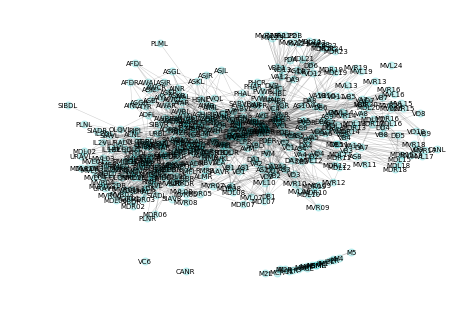

In [64]:
G=nx.Graph()


G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, node_color='c',edge_color='k',node_size=50,alpha=0.2,font_size=7,width=0.5, with_labels=True)

In [51]:
muscles.to_csv("Neurons_to_Muscles.csv")
connectome.to_csv("Connectome.csv")

In [53]:
import pickle
Neurotransmiters_2_coefficient = {"exc":1., "inh":-1.}
pickle.dump(Neurotransmiters_2_coefficient,open("Neurotransmiters_2_coefficient.pickle","wb"))